In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sb

date = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\train_minmax.pkl', 'rb'))

date = date.iloc[:500000,:]

num = pd.read_csv(r'E:\Git\ML\Kaggle_Bosch\Data\train_numeric.csv', nrows=500000)

data = num.merge(date, on =['Id'])

data.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,S35_Max,S8_Max,S13_Max,S11_Max,S38_Max,S43_Max,S29_Max,S34_Max,S45_Max,Duration
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,82.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.29
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1315.75
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,1618.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.42
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,1149.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1154.16
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,602.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606.02


In [4]:
pos = data[data['Response']==1]


min = pos.min(axis=0)
max = pos.max(axis=0)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

c = 'L3_S30_F3759'

features = [f for f in data.columns.values if f.startswith('L')]

for c in features[:100]:
    try:
        _, ax = plt.subplots(1,1,figsize=(15,4))
        ax.set_title(c)
        data[(data[c] > min[c]) & (data[c] < max[c]) & (data['Response']==1)][c].plot.hist(alpha=0.4, color='r', ax=ax, bins=200, log=True)
        data[(data[c] > min[c]) & (data[c] < max[c]) & (data['Response']==0)][c].plot.hist(alpha=0.4, color='b', ax=ax,bins=200, log=True)

        #plt.show()
        break
    except:
        continue
    
    

NameError: name 'data' is not defined

In [9]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sb


date = pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\train_minmax.pkl', 'rb'))
date = pd.concat((date, pickle.load(open(r'E:\Git\ML\Kaggle_Bosch\Data\test_minmax.pkl', 'rb'))))
date['min'] = date.min(axis=1)

date = date[['min', 'Id']]

In [32]:
t1 = pd.read_csv(r'E:\Git\ML\Kaggle_Bosch\Data\train_numeric.csv', usecols=['Id','Response'])
t2 =pd.read_csv(r'E:\Git\ML\Kaggle_Bosch\Data\test_numeric.csv', usecols=['Id'])

t2['Response'] = np.nan




In [33]:
t = pd.concat((t1,t2))

t = t.merge(date, on=['Id'])
t.head()

,Id,Response,min
0,4,0.0,0.0
1,6,0.0,0.0
2,7,0.0,0.0
3,9,0.0,0.0
4,11,0.0,0.0


In [35]:
t['leak1'] = t.sort(['min', 'Id'])['Id'].diff()
t['leak2'] = t.sort(['min', 'Id'])['Id'][::-1].diff()

C:\Users\serajago.FAREAST\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\serajago.FAREAST\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


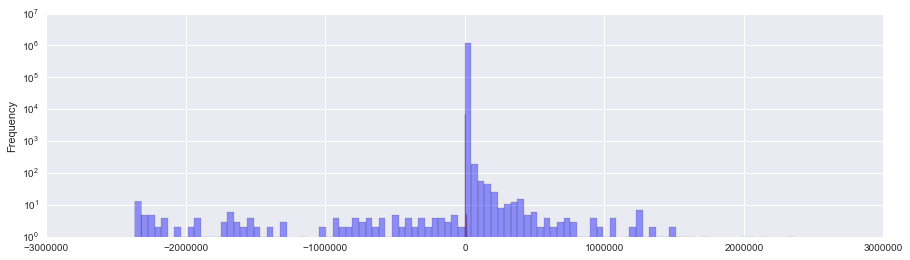

In [43]:
_,ax = plt.subplots(1,1, figsize=(15,4))
t[(t['Response']==1)]['leak1'].plot.hist(alpha=0.4, color='r', bins=100, ax=ax, log=True)
t[(t['Response']==0)]['leak1'].plot.hist(alpha=0.4, color='b', bins=100, ax=ax,log=True)
plt.show()

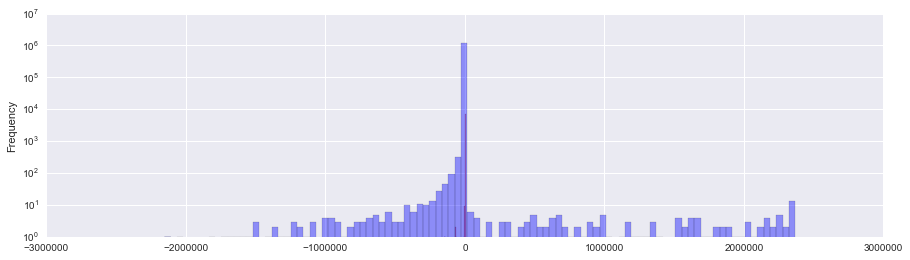

In [38]:
_,ax = plt.subplots(1,1, figsize=(15,4))
t[(t['Response']==1) ]['leak2'].plot.hist(alpha=0.4, color='r', bins=100, ax=ax, log=True)
t[(t['Response']==0)]['leak2'].plot.hist(alpha=0.4, color='b', bins=100, ax=ax,log=True)
plt.show()

In [37]:
t['leak1']

0                1.0
1                1.0
2                1.0
3                1.0
4                1.0
5                1.0
6                1.0
7               14.0
8                1.0
9                1.0
10               1.0
11               1.0
12               1.0
13               1.0
14               1.0
15               1.0
16               1.0
17               1.0
18               1.0
19               1.0
20               2.0
21               1.0
22               1.0
23               1.0
24              27.0
25               1.0
26               1.0
27               1.0
28               1.0
29        -2366975.0
             ...    
2367465          1.0
2367466          1.0
2367467          2.0
2367468          1.0
2367469          1.0
2367470          6.0
2367471          2.0
2367472          2.0
2367473          1.0
2367474          1.0
2367475          1.0
2367476          6.0
2367477          1.0
2367478          1.0
2367479          1.0
2367480         10.0
2367481      